# Assignment_18_Forecasting(2)

In [ ]:
Forecast the Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import statsmodels.formula.api as smf
from numpy import log
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel("Airlines+Data.xlsx")
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [5]:
df.rename(columns = {"Month": "date"}, inplace = True)

In [7]:
df.shape

(96, 2)

In [8]:
df.isnull().sum()

date          0
Passengers    0
dtype: int64

In [11]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


<AxesSubplot:>

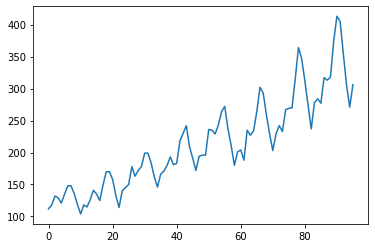

In [13]:
df.Passengers.plot()

In [15]:
df_air = df.copy()
df_air.head()

,date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [19]:
t_list = [x for x in range(1,len(df)+1)]
df_air['t'] = t_list

df_air['t_square'] = df_air['t']*df_air['t']

df_air['log_passengers'] = log(df.Passengers)
df_air.head()

,date,Passengers,t,t_square,log_passengers
0,1995-01-01,112,1,1,4.718499
1,1995-02-01,118,2,4,4.770685
2,1995-03-01,132,3,9,4.882802
3,1995-04-01,129,4,16,4.859812
4,1995-05-01,121,5,25,4.795791


In [20]:
df_air['months'] = df['date'].dt.month_name() 
df_air['months'] = [x[0:3] for x in df_air.months] 
df_air['year']   = df['date'].dt.year
df_air

,date,Passengers,t,t_square,log_passengers,months,year
0,1995-01-01,112,1,1,4.718499,Jan,1995
1,1995-02-01,118,2,4,4.770685,Feb,1995
2,1995-03-01,132,3,9,4.882802,Mar,1995
3,1995-04-01,129,4,16,4.859812,Apr,1995
4,1995-05-01,121,5,25,4.795791,May,1995
...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887,Aug,2002
92,2002-09-01,355,93,8649,5.872118,Sep,2002
93,2002-10-01,306,94,8836,5.723585,Oct,2002
94,2002-11-01,271,95,9025,5.602119,Nov,2002


In [21]:
dummy = pd.DataFrame(pd.get_dummies(df_air['months']))
dummy.reindex(sorted(dummy.columns), axis=1)
colsequence = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dummy = dummy.reindex(columns=colsequence )

df_air = pd.concat([df_air,dummy], axis=1)
df_air

,date,Passengers,t,t_square,log_passengers,months,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,1,1,4.718499,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,2,4,4.770685,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,9,4.882802,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,4,16,4.859812,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,25,4.795791,May,1995,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,93,8649,5.872118,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,94,8836,5.723585,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,95,9025,5.602119,Nov,2002,0,0,0,0,0,0,0,0,0,0,1,0


In [22]:
df_air['months'] = df['date'].dt.month_name()
df_air['months'] = [x[0:3] for x in df_air.months]
df_air

,date,Passengers,t,t_square,log_passengers,months,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,1,1,4.718499,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,2,4,4.770685,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,9,4.882802,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,4,16,4.859812,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,25,4.795791,May,1995,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,93,8649,5.872118,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,94,8836,5.723585,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,95,9025,5.602119,Nov,2002,0,0,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:xlabel='months', ylabel='year'>

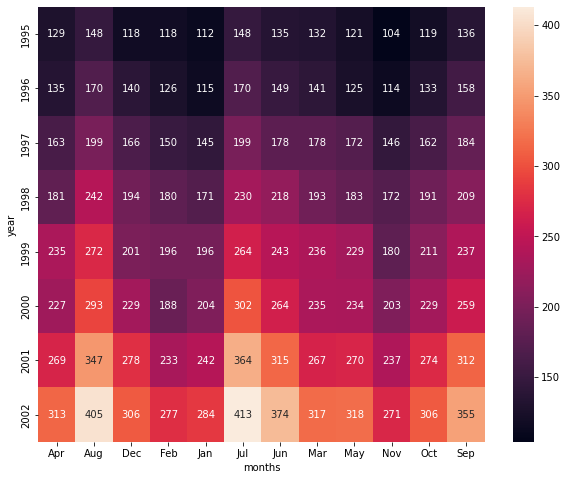

In [24]:
heatmap_passengers = pd.pivot_table(data=df_air,values='Passengers',index='year',
                                    columns='months',aggfunc='mean',fill_value=0)
plt.figure(figsize=(10,8))
sns.heatmap(data =heatmap_passengers , annot=True,fmt='g')

<AxesSubplot:xlabel='year', ylabel='Passengers'>

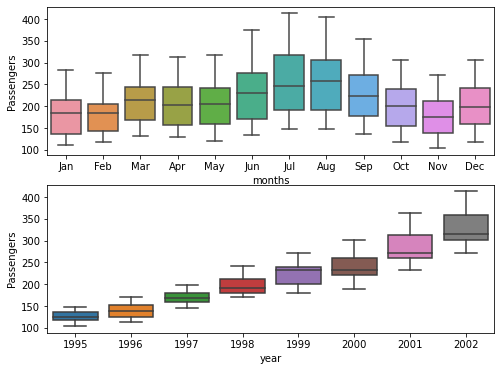

In [25]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x='months', y='Passengers', data=df_air)
plt.subplot(212)
sns.boxplot(x='year', y='Passengers', data=df_air)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

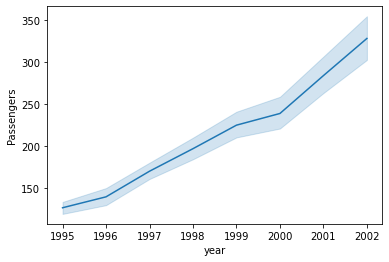

In [27]:
sns.lineplot(x='year',y='Passengers',data=df_air)

<AxesSubplot:xlabel='months', ylabel='Passengers'>

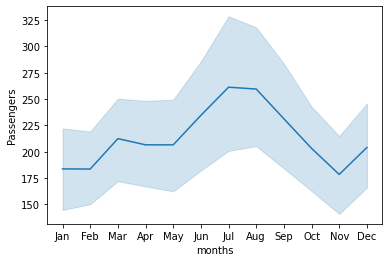

In [29]:
sns.lineplot(x='months',y='Passengers',data=df_air)

In [30]:
x_train = df_air.head(76)
x_test  = df_air.tail(20)
print(x_train.shape)
print(x_test.shape)

(76, 19)
(20, 19)


In [31]:
x_test

,date,Passengers,t,t_square,log_passengers,months,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
76,2001-05-01,270,77,5929,5.598422,May,2001,0,0,0,0,1,0,0,0,0,0,0,0
77,2001-06-01,315,78,6084,5.752573,Jun,2001,0,0,0,0,0,1,0,0,0,0,0,0
78,2001-07-01,364,79,6241,5.897154,Jul,2001,0,0,0,0,0,0,1,0,0,0,0,0
79,2001-08-01,347,80,6400,5.849325,Aug,2001,0,0,0,0,0,0,0,1,0,0,0,0
80,2001-09-01,312,81,6561,5.743003,Sep,2001,0,0,0,0,0,0,0,0,1,0,0,0
81,2001-10-01,274,82,6724,5.613128,Oct,2001,0,0,0,0,0,0,0,0,0,1,0,0
82,2001-11-01,237,83,6889,5.468060,Nov,2001,0,0,0,0,0,0,0,0,0,0,1,0
83,2001-12-01,278,84,7056,5.627621,Dec,2001,0,0,0,0,0,0,0,0,0,0,0,1
84,2002-01-01,284,85,7225,5.648974,Jan,2002,1,0,0,0,0,0,0,0,0,0,0,0
85,2002-02-01,277,86,7396,5.624018,Feb,2002,0,1,0,0,0,0,0,0,0,0,0,0


In [32]:
#Linear
le_model         = smf.ols('Passengers~t',data=x_train).fit()
predicted_linear = pd.Series(le_model.predict(pd.DataFrame(x_test['t'])))
rmse_linear      = np.sqrt(np.mean(np.array(x_test['Passengers'])-np.array(predicted_linear))**2)
rmse_linear      = round(rmse_linear,2)
rmse_linear

36.02

In [33]:
#Exponential

Exp      = smf.ols('log_passengers~t',data=x_train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(x_test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(x_test['log_passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp = round(rmse_Exp,2)
rmse_Exp

298.66

In [34]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_square',data=x_train).fit()
pred_Quad = pd.Series(Quad.predict(x_test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(x_test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad = round(rmse_Quad,2)
rmse_Quad

58.49

In [35]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=x_train).fit()
pred_add_sea = pd.Series(add_sea.predict(x_test[['Jan','Feb','Mar','Apr','May','Jun','Jul',
                                               'Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(x_test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea = round(rmse_add_sea,2)
rmse_add_sea

132.25

In [36]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',
                       data=x_train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(x_test[['Jan','Feb','Mar','Apr','May','Jun','Jul',
                                               'Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(x_test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad = round(rmse_add_sea_quad,2)
rmse_add_sea_quad

39.76

In [37]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',
                  data = x_train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(x_test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(x_test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea = round(rmse_Mult_sea,2)
rmse_Mult_sea

137.61

In [45]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',
                      data = x_train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(x_test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(x_test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea = round(rmse_Mult_add_sea,2)
rmse_Mult_add_sea

11.78

In [49]:
#additive seasonality with linear trend
add_sea_lin = smf.ols('Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',
                       data=x_train).fit()
pred_add_linear = pd.Series(add_sea_lin.predict(x_test[['Jan','Feb','Mar','Apr','May','Jun','Jul',
                                               'Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_linear = np.sqrt(np.mean((np.array(x_test['Passengers'])-np.array(pred_add_linear))**2))
rmse_add_linear = round(rmse_add_linear,2)
rmse_add_linear

40.3

In [48]:
#Multiplicative Seasonality with quadratic trend

Mul_quad_sea = smf.ols('log_passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',
                      data = x_train).fit()
pred_Mult_quad_sea = pd.Series(Mul_quad_sea.predict(x_test))
rmse_Mult_quad_sea = np.sqrt(np.mean((np.array(x_test['Passengers'])-np.array(np.exp(pred_Mult_quad_sea)))**2))
rmse_Mult_quad_sea = round(rmse_Mult_quad_sea,2)
rmse_Mult_quad_sea

35.61

In [50]:
#comparing the results
model_list                = ["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_linear","rmse_add_sea_quad","rmse_Mult_sea",
                                 "rmse_Mult_add_sea","rmse_Mult_quad_sea"]
rmse_val_list             = [rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_linear,rmse_add_sea_quad,rmse_Mult_sea,
                                 rmse_Mult_add_sea,rmse_Mult_quad_sea]

table_rmse                = pd.DataFrame(columns=['Model','RMSE Values'])
table_rmse['Model']       = model_list
table_rmse['RMSE Values'] = rmse_val_list

table_rmse.sort_values(by=['RMSE Values'])

,Model,RMSE Values
7,rmse_Mult_add_sea,11.78
8,rmse_Mult_quad_sea,35.61
0,rmse_linear,36.02
5,rmse_add_sea_quad,39.76
4,rmse_add_linear,40.30
2,rmse_Quad,58.49
3,rmse_add_sea,132.25
6,rmse_Mult_sea,137.61
1,rmse_Exp,298.66


# Predict for new time period

In [51]:
new_data = df_air.tail(12)
new_data

,date,Passengers,t,t_square,log_passengers,months,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
84,2002-01-01,284,85,7225,5.648974,Jan,2002,1,0,0,0,0,0,0,0,0,0,0,0
85,2002-02-01,277,86,7396,5.624018,Feb,2002,0,1,0,0,0,0,0,0,0,0,0,0
86,2002-03-01,317,87,7569,5.758902,Mar,2002,0,0,1,0,0,0,0,0,0,0,0,0
87,2002-04-01,313,88,7744,5.746203,Apr,2002,0,0,0,1,0,0,0,0,0,0,0,0
88,2002-05-01,318,89,7921,5.762051,May,2002,0,0,0,0,1,0,0,0,0,0,0,0
89,2002-06-01,374,90,8100,5.924256,Jun,2002,0,0,0,0,0,1,0,0,0,0,0,0
90,2002-07-01,413,91,8281,6.023448,Jul,2002,0,0,0,0,0,0,1,0,0,0,0,0
91,2002-08-01,405,92,8464,6.003887,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,93,8649,5.872118,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,94,8836,5.723585,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0


In [52]:
new_data = new_data.drop(columns=['Passengers','log_passengers','year'])

In [53]:
new_data

,date,t,t_square,months,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
84,2002-01-01,85,7225,Jan,1,0,0,0,0,0,0,0,0,0,0,0
85,2002-02-01,86,7396,Feb,0,1,0,0,0,0,0,0,0,0,0,0
86,2002-03-01,87,7569,Mar,0,0,1,0,0,0,0,0,0,0,0,0
87,2002-04-01,88,7744,Apr,0,0,0,1,0,0,0,0,0,0,0,0
88,2002-05-01,89,7921,May,0,0,0,0,1,0,0,0,0,0,0,0
89,2002-06-01,90,8100,Jun,0,0,0,0,0,1,0,0,0,0,0,0
90,2002-07-01,91,8281,Jul,0,0,0,0,0,0,1,0,0,0,0,0
91,2002-08-01,92,8464,Aug,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,93,8649,Sep,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,94,8836,Oct,0,0,0,0,0,0,0,0,0,1,0,0


In [54]:
df_air = df_air.head(84)
print(df_air.shape)
df_air.tail()

(84, 19)


,date,Passengers,t,t_square,log_passengers,months,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
79,2001-08-01,347,80,6400,5.849325,Aug,2001,0,0,0,0,0,0,0,1,0,0,0,0
80,2001-09-01,312,81,6561,5.743003,Sep,2001,0,0,0,0,0,0,0,0,1,0,0,0
81,2001-10-01,274,82,6724,5.613128,Oct,2001,0,0,0,0,0,0,0,0,0,1,0,0
82,2001-11-01,237,83,6889,5.468060,Nov,2001,0,0,0,0,0,0,0,0,0,0,1,0
83,2001-12-01,278,84,7056,5.627621,Dec,2001,0,0,0,0,0,0,0,0,0,0,0,1


In [55]:
#picked the model with the lowest RMSE value
#training the model on the entire dataset
model_full = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',
                      data = df_air).fit()

In [56]:
predicted_new = model_full.predict(new_data)
predicted_new

84    5.632141
85    5.647734
86    5.792098
87    5.756366
88    5.746648
89    5.865009
90    5.972273
91    5.972648
92    5.865485
93    5.738005
94    5.606271
95    5.744972
dtype: float64

In [57]:
new_data['forecasted_passengers'] = predicted_new
new_data

,date,t,t_square,months,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,forecasted_passengers
84,2002-01-01,85,7225,Jan,1,0,0,0,0,0,0,0,0,0,0,0,5.632141
85,2002-02-01,86,7396,Feb,0,1,0,0,0,0,0,0,0,0,0,0,5.647734
86,2002-03-01,87,7569,Mar,0,0,1,0,0,0,0,0,0,0,0,0,5.792098
87,2002-04-01,88,7744,Apr,0,0,0,1,0,0,0,0,0,0,0,0,5.756366
88,2002-05-01,89,7921,May,0,0,0,0,1,0,0,0,0,0,0,0,5.746648
89,2002-06-01,90,8100,Jun,0,0,0,0,0,1,0,0,0,0,0,0,5.865009
90,2002-07-01,91,8281,Jul,0,0,0,0,0,0,1,0,0,0,0,0,5.972273
91,2002-08-01,92,8464,Aug,0,0,0,0,0,0,0,1,0,0,0,0,5.972648
92,2002-09-01,93,8649,Sep,0,0,0,0,0,0,0,0,1,0,0,0,5.865485
93,2002-10-01,94,8836,Oct,0,0,0,0,0,0,0,0,0,1,0,0,5.738005


<AxesSubplot:>

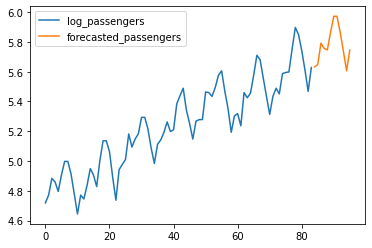

In [59]:
new_var = pd.concat([df_air,new_data])
new_var[['log_passengers','forecasted_passengers']].reset_index(drop=True).plot()

<AxesSubplot:title={'center':'Passenger count for the year 2002'}, xlabel='months', ylabel='forecasted_passengers'>

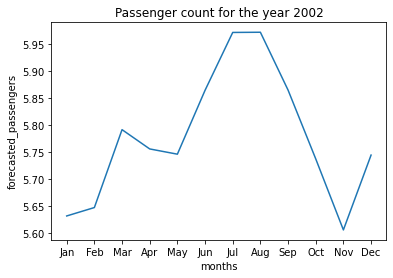

In [60]:
plt.title('Passenger count for the year 2002')
sns.lineplot(x='months',y='forecasted_passengers',data=new_data)